# Libraries

In [91]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix



# Loading the files

In [92]:
#pickle file for train set

with open('/Users/divyansh/Downloads/Train-Test Data/train_features.pickle','rb') as f:
    traindf=pickle.load(f)

In [93]:
traindf.shape

(4000, 162)

In [94]:
#pickle file for test set

with open('/Users/divyansh/Downloads/Train-Test Data/test_features.pickle','rb') as f:
    testdf=pickle.load(f)



In [95]:
#Letting it test only on 100 files for now, we can tune this acc to our need
#Not much of accuracy changes for the model, or has any greater impact

testdf=testdf.iloc[0:100,:]

In [96]:
testdf.shape

(100, 162)

# Defining Train/Test Sets

In [97]:
#Training sets
X_train=traindf.drop(labels='targets',axis=1)
Y_train=traindf['targets']

#Testing sets
X_test=testdf.drop(labels='targets',axis=1)
Y_test=testdf['targets']


In [98]:
instruments=['brass','bass','flute','guitar','keyboard','mallet','organ','reed','string','synth_lead','vocal']

# Random Forest Classifier

In [99]:
#Initialize the Classifier

rfclassifier = RandomForestClassifier(n_estimators=20,max_depth=50,warm_start=True)


In [100]:
#Fitting the Classifier to X,Y train 

rfclassifier.fit(X_train,Y_train)


RandomForestClassifier(max_depth=50, n_estimators=20, warm_start=True)

In [101]:
Predicted_Instrument=rfclassifier.predict(X_test)

In [102]:
#Accuracy for Random Forest Classifier

accuracy_rfc = np.mean(Predicted_Instrument == Y_test)
print("Accuracy of Random Forest is {0:.2%}".format(accuracy_rfc))



Accuracy of Random Forest is 86.00%


# Confusion Matrix

In [103]:
confusion_matrix(Y_test,Predicted_Instrument,normalize=None)


array([[ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 21,  0,  1,  1,  1,  0,  0,  0,  0],
       [ 0,  0,  8,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  0, 17,  1,  0,  0,  0,  0,  0],
       [ 1,  0,  1,  2, 12,  0,  1,  1,  1,  0],
       [ 0,  0,  0,  0,  0,  3,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  1,  0, 12,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  6,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  4,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  2]])

# Plotting Confusion Matrix

In [104]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j,i,cm[i,j],
                     horizontalalignment="center",
                     color="white" if cm[i,j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [105]:
cm= confusion_matrix(Y_test,Predicted_Instrument,normalize=None)


Confusion matrix, without normalization
[[ 1  0  0  0  0  0  0  0  0  0]
 [ 0 21  0  1  1  1  0  0  0  0]
 [ 0  0  8  0  0  0  0  0  0  0]
 [ 0  1  0 17  1  0  0  0  0  0]
 [ 1  0  1  2 12  0  1  1  1  0]
 [ 0  0  0  0  0  3  0  0  0  0]
 [ 0  1  0  0  1  0 12  0  0  0]
 [ 0  0  0  0  0  0  0  6  0  0]
 [ 0  0  0  0  0  0  0  0  4  0]
 [ 0  0  0  0  0  0  0  0  0  2]]


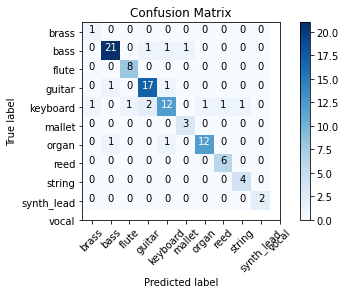

In [106]:
plot_confusion_matrix(cm=cm, classes = instruments, title= 'Confusion Matrix')

In [107]:
#Tested on a 100 test examples, where theres unequal distribution for instrument files.
#That's no worry, if we test it on the entire test dataset then the numbers would change for each instrument family.

# References

- [Scikit-Learn](https://scikit-learn.org/0.18/auto_examples/model_selection/plot_confusion_matrix.html)
    Used their sample code for displaying the Confusion Matrix